In [2]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy as sp
from pprint import pprint
import quandl
from config import api_key
import numpy as np
from matplotlib.pyplot import figure
from scipy import stats
from scipy.stats import linregress

In [3]:
master_csv = pd.read_csv("pw_master_data_cleaned.csv")
master_csv

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.00,30566,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.00,30566,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.00,30566,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.00,30566,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.00,30566,3.5,3.88,3.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67019,2020,Sep,2020-9,9/26/2020,NaN,CRAW,"Share of Listings With a Price Cut (Raw, All H...",394645,metro,"Greeley, CO",0.05,332367,6.4,NaN,NaN
67020,2020,Sep,2020-9,9/19/2020,NaN,CRSW,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.04,332367,6.4,NaN,NaN
67021,2020,Sep,2020-9,9/26/2020,NaN,CRSW,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.05,332367,6.4,NaN,NaN
67022,2020,Sep,2020-9,9/30/2020,NaN,CRSM,"Share of Listings With a Price Cut (Raw, SFR O...",394645,metro,"Greeley, CO",0.13,332367,6.4,NaN,NaN


In [4]:
isam_df = master_csv.loc[master_csv['Indicator ID']=='ISAM']
isam_df = isam_df.drop_duplicates(subset=['Indicator ID', 'Value', 'Region Name'])

The correlation coefficient is 0.0
The line equation is as follows:  y = 7.92x + 5290.51


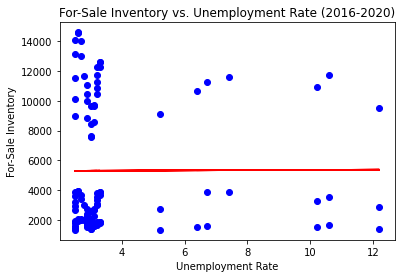

In [5]:
#combined graph for presentation -- Unemployment Rate
x_values = isam_df['Unemployment Rate']
y_values = isam_df['Value']

plt.xlabel('Unemployment Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. Unemployment Rate (2016-2020)")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("master_csv_isam_unemployment.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

The correlation coefficient is 0.6
The line equation is as follows:  y = 0.01x + -2681.51


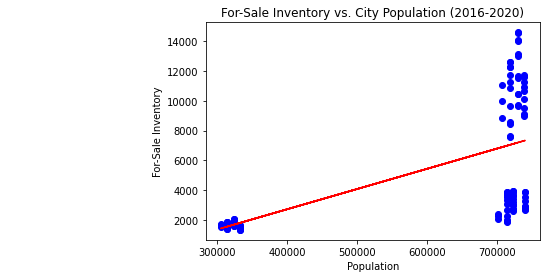

In [6]:
#combined graph for presentation -- Unemployment Rate
x_values = isam_df['County Population']
y_values = isam_df['Value']

plt.xlabel('Population')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. City Population (2016-2020)")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("master_csv_isam_population.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

The correlation coefficient is -0.04
The line equation is as follows:  y = -299.46x + 6501.29


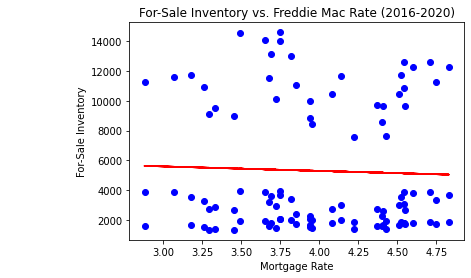

In [7]:
#combined graph for presentation -- Unemployment Rate
fmac_df = isam_df.dropna(axis=0, how='any')
x_values = fmac_df['Freddie Mac Rate']
y_values = fmac_df['Value']

plt.xlabel('Mortgage Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. Freddie Mac Rate (2016-2020)")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("master_csv_isam_freddiemac.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

In [8]:
#sort master into 4 based on region name
denver_df = isam_df.loc[isam_df['Region Name']=='Denver, CO']
greeley_df = master_csv.loc[master_csv['Region Name']=='Greeley, CO']
csprings_df = master_csv.loc[master_csv['Region Name']=='Colorado Springs, CO']
breck_df = master_csv.loc[master_csv['Region Name']=='Breckenridge, CO; CO']

In [ ]:
#ISAM & IRSW for Denver
denver_isam = denver_df.loc[denver_df['Indicator ID']=='ISAM']
denver_isam

In [ ]:
#ISAM for Colorado Springs
csprings_isam = csprings_df.loc[csprings_df['Indicator ID']=='ISAM']
csprings_isam_grouped = csprings_isam.groupby("Year-Month").first()
csprings_isam_grouped


In [ ]:
#ISAM & ISRW for Greeley
greeley_isam = greeley_df.loc[greeley_df['Indicator ID']=='ISAM']
greeley_isam_grouped = greeley_isam.groupby("Year-Month").first()
greeley_isam_grouped

In [ ]:
clean_greeley_df = greeley_isam.drop_duplicates(subset=['Indicator ID', 'Value', 'Region Name'])
x_values = clean_greeley_df['Unemployment Rate']
y_values = clean_greeley_df['Value']

plt.xlabel('Unemployment Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. Unemployment Rate (Greeley 2016-2020)")

#plt.xticks(rotation = 'vertical')
plt.rcParams["figure.figsize"] = (5,5)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("greeley_isam_unemployment.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

In [ ]:
plt.scatter(greeley_isam['Year-Month'], greeley_isam['Value'])
#plt.figure(figsize=(20,20))
plt.xticks(rotation = 'vertical')
plt.rcParams["figure.figsize"] = (15,8)
plt.xlabel('Year-Month')
plt.ylabel('Number of Listings in Greeley')
plt.title("Number of listings in Greeley 2016-2020")

In [ ]:
clean_denver_df = denver_isam.drop_duplicates(subset=['Indicator ID', 'Value', 'Region Name'])
x_values = clean_denver_df['Unemployment Rate']
y_values = clean_denver_df['Value']

plt.xlabel('Unemployment Rate')
plt.ylabel('For-Sale Inventory')
plt.title("For-Sale Inventory vs. Unemployment Rate (Denver 2016-2020)")

#plt.xticks(rotation = 'vertical')
#plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x_values, y_values, color="blue")

#invoke stats.linregress
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#annotate
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2, 10),fontsize=15,color="red",)
plt.savefig("denver_isam_unemployment.png")
print(f"The correlation coefficient is {round(stats.pearsonr(x_values,y_values)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

Text(0.5, 1.0, 'For-Sale Inventory & Unemployment Rate (Denver 2016-2020)')

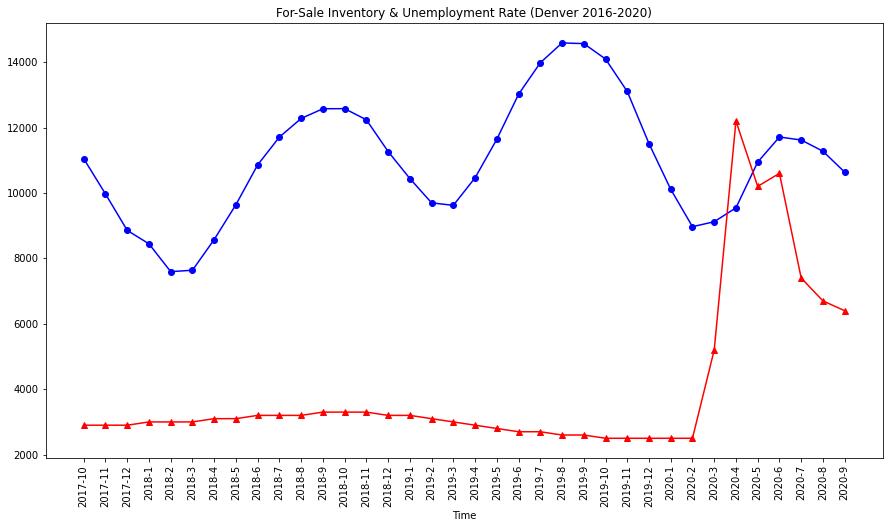

In [22]:
# Assign plots to tuples that stores result of plot
x_axis = denver_df['Year-Month']
inventory = denver_df['Value']
unemployment = denver_df['Unemployment Rate']*1000
# Each point on the sine chart is marked by a blue circle
sine_handle, = plt.plot(x_axis, inventory, marker ='o', color='blue', label="Sine")
# Each apoint on the cosine chart is marked by a red triangle
cosine_handle, = plt.plot(x_axis, unemployment, marker='^', color='red', label="Cosine")

plt.rcParams["figure.figsize"] = (15,8)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('')
plt.title("For-Sale Inventory & Unemployment Rate (Denver 2016-2020)")

In [ ]:
indicators_url = "https://www.quandl.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key="
query_url = indicators_url + quandl_key
response = requests.get(query_url).json()
#pprint(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
regions_url = "https://www.quandl.com/api/v3/datatables/ZILLOW/regions.json?region_type=city&api_key="
rquery_url = regions_url + quandl_key
r_response = requests.get(rquery_url).json()
#print(json.dumps(r_response, indent=4, sort_keys=True))
region_ids = pd.read_csv('data/zillow_region_ids.csv')
#region_ids
#region_ids[region_ids['Neighborhood'].str.contains('Denver')]
region_ids[region_ids['State_abrv'].str.contains('CO')]


In [ ]:
co_region_ids = [11093, 16846, 5519, 20793, 34781, 10181, 44515, 38992, 33334, 10574, 23984, 17545, 19055, 17163, 4592,
                 26213, 119842, 50547, 45470, 24634, 119404,
                 12834, 24367, 120381, 7811, 38807, 46297, 17755, 52003, 4548, 119221, 13759, 119157, 55662, 4197,
                 16865, 120317, 37852, 36384, 7507, 44909, 119469, 8471, 39098, 52230, 38324, 120500, 13288, 16394,
                 49882, 120020, 395432, 21854, 17754, 119632, 22800, 119114, 56787, 24366, 24665, 4960, 52196, 120107,
                 8179, 119390, 36867, 16729, 46104, 46323, 24170, 120333, 11824, 50963, 24590, 11751, 31633, 12042,
                 120074, 13856, 45936, 55580, 39666, 54425, 396043, 42203, 23185, 30476, 6510, 396035, 16589, 50328]

In [ ]:
#data = quandl.get_table('ZACKS/FC', paginate=True, ticker=['AAPL', 'MSFT'],
#per_end_date={'gte': '2015-01-01'}, qopts={'columns':['ticker', 'per_end_date']})
isaw_data = quandl.get_table("ZILLOW/DATA", api_key=quandl_key,
                             indicator_id='ISAW', paginate=True)#, region_id = co_region_ids)
isaw_data



#np.where(data['region_id']==4592)
#per_end_date={'gte': '2016-04-26'}

In [ ]:
data3.loc[data3['region_id']=='753924']

In [ ]:
data3

In [ ]:
z1br= quandl.get_table('Zillow/Data', api_key=quandl_key, indicator_id = 'Z1BR', paginate=True, region_id = co_region_ids)
z1br

In [ ]:
isaw = quandl.get_table('Zillow/Data', api_key=quandl_key, indicator_id = 'ISAW', paginate=True, region_id = co_metro_ids)
#isaw
isaw["date"]= pd.to_datetime(isaw["date"])
isaw_dated =isaw.loc[isaw["date"] > "2016-04-01"]
#isaw
isaw_dated

In [ ]:
#quandl.bulkdownload("ZILLOW/DATA", quandl_key)
#zillow_data = quandl.export_table('ZILLOW/DATA', api_key=quandl_key)

In [ ]:
data2 = quandl.get_table("ZILLOW/INDICATORS", api_key="YOUR KEY HERE")
data2

In [ ]:
#REGIONS TABLE
data3 = quandl.get_table("ZILLOW/REGIONS", api_key=quandl_key, paginate=True)
data3
#FOUND CO COUNTIES
co_region = data3[data3['region'].str.contains('CO')]
co_county = co_region[co_region['region_type']=='county']
co_county_ids = co_county['region_id'].tolist()
co_metros = co_region[co_region['region_type']=='metro']
co_metro_ids = co_metros['region_id'].tolist()
print(co_metro_ids)
#print(co_county_ids)